In [ ]:
!pip install --upgrade spacy pandas scikit-learn
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4 requests --only-binary :all:

# Clinical Psycholinguistics: Automated Complexity Screening

Project Abstract

This project applies Natural Language Processing (NLP) to identify linguistic biomarkers for cognitive health. By analyzing lexical diversity and syntactic density, the model identifies "At Risk" vs. "Healthy" linguistic profiles.

Research Context: In clinical linguistics, neurological stress (often caused by neurotoxins) manifests as a simplification of language. This tool automates the detection of these shifts.

### Feature Engineering: Quantifying Complexity

We extract three core psycholinguistic metrics using spaCy:

- Lexical Diversity (TTR): Unique words divided by total words.

- Mean Word Length: A measure of lexical sophistication.

- Noun Density: The ratio of informational nouns to functional words.

Successfully loaded 25 research samples.
Analyzing linguistic biomarkers...
Model Accuracy: 100.00%


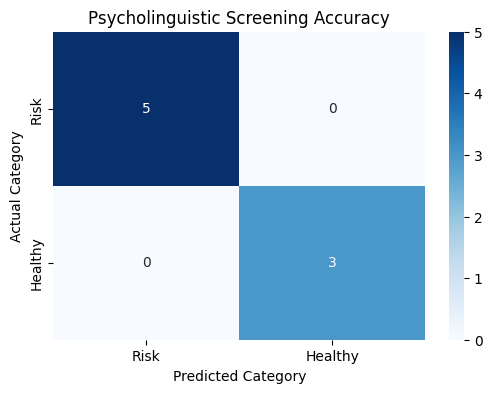


Screening Sample: 'The patient demonstrates a significant reduction in lexical variety and sentence length.'
Prediction: Healthy


/Users/ejgyll/Downloads/Stuttgart/Projects/Programming/GitHub Projects/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [2]:
import pandas as pd
import spacy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Loading the English NLP data ###
nlp = spacy.load("en_core_web_sm")

### 2. Loading CSV data ###
try:
    df = pd.read_csv('psycholinguistic_data.csv')
    print(f"Successfully loaded {len(df)} research samples.")
except FileNotFoundError:
    print("Error: psycholinguistic_data.csv not found. Please create the file first!")

### 3. Feature Engineering for Psycholinguistics ###
def get_linguistic_stats(text):
    doc = nlp(text)

    # 3a: Lexical Diversity (TTR)
    tokens = [t.text.lower() for t in doc if not t.is_punct]
    ttr = len(set(tokens)) / len(tokens) if len(tokens) > 0 else 0
    
    # 3b: Average Word Length
    avg_word_len = sum(len(t.text) for t in doc) / len(doc)
    
    # 3c: Noun Density (Since complex speech uses more nouns)
    noun_count = len([t for t in doc if t.pos_ == "NOUN"])
    noun_density = noun_count / len(doc)
    
    return pd.Series([ttr, avg_word_len, noun_density])

print("Analyzing linguistic biomarkers...")
df[['diversity', 'word_len', 'noun_density']] = df['Text'].apply(get_linguistic_stats)

### 4. Model Training ###
X = df[['diversity', 'word_len', 'noun_density']]
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

### 5. Evaluation ###
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc * 100:.2f}%")

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Risk', 'Healthy'], yticklabels=['Risk', 'Healthy'])
plt.title("Psycholinguistic Screening Accuracy")
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.show()

### 6. Testing phase, with new clinical sample ###
test_sample = "The patient demonstrates a significant reduction in lexical variety and sentence length."
test_feats = get_linguistic_stats(test_sample)
prediction = model.predict([test_feats])

print(f"\nScreening Sample: '{test_sample}'")
print(f"Prediction: {'Healthy' if prediction[0] == 1 else 'At risk'}")